In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
folder_path = '../../Data/sclc_ucologne_2015/'
file_name = 'data_clinical_patient_original.txt'
file_path = folder_path + '/' + file_name
# Load the RNAseq data from the csv file
data = pd.read_csv(file_path, sep='\t', index_col=0, header=0,skiprows=4, usecols=['PATIENT_ID','AGE', 'ETHNICITY', 'SEX', 'OS_STATUS', 'OS_MONTHS']  )


# the columns correspond to the patient IDs
# delete rows with no OS_STATUS
data = data[data['OS_STATUS'].notna()]
# Get the column names
data.head()

,AGE,SEX,ETHNICITY,OS_STATUS,OS_MONTHS
PATIENT_ID,,,,,
sclc_ucologne_2015_S00022,47.0,Male,NaN,1:DECEASED,38.0
sclc_ucologne_2015_S00035,65.0,Female,NaN,1:DECEASED,12.0
sclc_ucologne_2015_S00050,47.0,Male,NaN,1:DECEASED,42.0
sclc_ucologne_2015_S00213,65.0,Male,NaN,1:DECEASED,13.0
sclc_ucologne_2015_S00356,54.0,Female,NaN,1:DECEASED,33.0


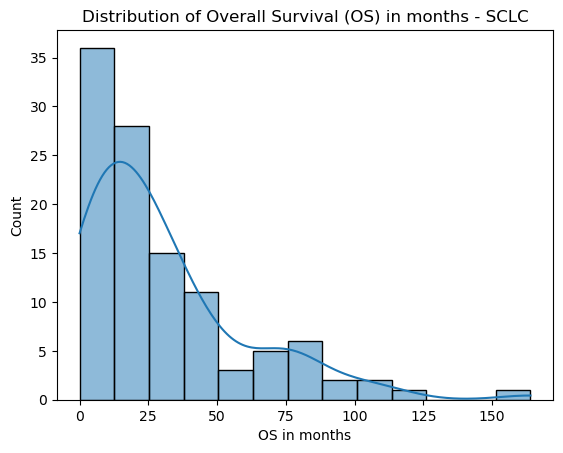

In [10]:
# plot distribution of OS_MONTHS
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data['OS_MONTHS'], kde=True)
plt.title('Distribution of Overall Survival (OS) in months - SCLC')
plt.xlabel('OS in months')
plt.show()

In [5]:
data["race"] = data["ETHNICITY"]
data['age_at_diagnosis'] = data['AGE']
data['year_of_diagnosis'] = 2015 
data['year_of_birth'] = 2015 - data['AGE'] 
data['overall_survival'] = data['OS_MONTHS']
data['vital_status'] = data['OS_STATUS']
data['disease_specific_survival'] = data['OS_MONTHS']
data['primary_site'] = 'Bronchus and lung'


In [6]:
#replace "Asian" with "NOT HISPANIC OR LATINO, other with nan
data["ETHNICITY"].replace({"Asian": "NOT HISPANIC OR LATINO"}, inplace=True)
#other with Nan

# Replace all other values that are not "NOT HISPANIC OR LATINO" with NaN
data["ETHNICITY"] = data["ETHNICITY"].apply(lambda x: "NOT HISPANIC OR LATINO" if x == "NOT HISPANIC OR LATINO" else np.nan)



In [5]:
data["race"].replace({"Caucasian": "WHITE", "Asian": "ASIAN"}, inplace=True)

In [6]:
#change column names
data.rename(columns = {'PATIENT_ID':'patient_id', 'SEX': 'gender', 'ETHNICITY':'ethnicity' }, inplace = True)

In [7]:
#drop AGE, OS_STATUS, OS_MONTHS
data.drop(columns = ['AGE', 'OS_STATUS', 'OS_MONTHS'], inplace = True)

In [8]:
#replace vital status labels  for binary classification, 
# nomenclature 1:DECEASED 0:LIVING
# just keep 1 or 0
data["vital_status"].replace({"1:DECEASED": 1, "0:LIVING": 0}, inplace=True)



In [9]:
#show unique values for ethnicity and race
data.ethnicity.unique()

#use new encoding:
#0: Not Known
#1: 'NOT HISPANIC OR LATINO'


data.ethnicity.replace({"NOT HISPANIC OR LATINO": 1}, inplace=True)
data.ethnicity.fillna(0, inplace=True)


In [10]:
data.race.unique()


data.race.replace({"WHITE": 1, "ASIAN": 2}, inplace=True)
data.race.fillna(0, inplace=True)

In [16]:
data.head()
print(data.shape)

(110, 10)


In [12]:
#print the row for which overall_survival is nan
data[data['overall_survival'].isnull()]
#drop this row from the dataframe
data.dropna(subset=['overall_survival'], inplace=True)


In [17]:
# count overall_survival values over 60 months
data.overall_survival.value_counts().agg('sum')

110

In [71]:
#save to tsv
data.to_csv(folder_path + '/data_clinical_patient.csv', sep=',')


In [72]:
#smaller dataset for testing, with less columns (patients) and rows (genes)

# data = data.iloc[:5, :5]
# data.to_csv(folder_path + '/data_clinical_patient_small.csv', sep='\t')
